# Dalsze przetwarzanie danych i feature enginering

Rozszerzenie notebooku Mikołaja o:
- feature engineering, usunięcie niepotrzebnych atrybutów i dodanie wyliczanych
- normalizację danych
- analizę i rozwiązanie problemu brakujących metadanych

In [1]:
import os

os.chdir("..")
from supernova.config import RAW_DATA_DIR, PROCESSED_DATA_DIR

from typing import Any
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
seqs = pd.read_csv(RAW_DATA_DIR / "training_set.csv")
meta = pd.read_csv(RAW_DATA_DIR / "training_set_metadata.csv")

In [3]:
seqs

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
...,...,...,...,...,...,...
1421700,130779836,60555.9838,4,-39.881969,46.477093,0
1421701,130779836,60560.0459,1,14.894439,18.947685,0
1421702,130779836,60571.0225,5,30.593130,50.695290,0
1421703,130779836,60585.9974,4,-23.471439,44.819859,0


In [4]:
seqs.describe()

,object_id,mjd,passband,flux,flux_err,detected
count,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06
mean,3.392608e+07,6.017921e+04,2.783108e+00,2.468855e+01,2.548932e+01,1.666168e-01
std,4.258439e+07,3.092379e+02,1.703946e+00,3.684506e+03,3.814492e+03,3.726336e-01
min,6.150000e+02,5.958003e+04,0.000000e+00,-1.149388e+06,4.637530e-01,0.000000e+00
25%,1.843400e+05,5.989905e+04,1.000000e+00,-2.789418e+00,2.118670e+00,0.000000e+00
50%,4.548783e+06,6.019331e+04,3.000000e+00,7.331990e-01,4.708105e+00,0.000000e+00
75%,6.796280e+07,6.048722e+04,4.000000e+00,8.830932e+00,1.297371e+01,0.000000e+00
max,1.307798e+08,6.067436e+04,5.000000e+00,2.432809e+06,2.234069e+06,1.000000e+00


In [5]:
meta

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
...,...,...,...,...,...,...,...,...,...,...,...,...
7843,130739978,26.718750,-14.940303,172.342697,-72.255675,0,0.0000,0.0000,0.0000,NaN,0.013,65
7844,130755807,120.101349,-62.696659,275.742955,-16.509746,0,0.1725,2.5606,1.1146,46.6108,0.136,90
7845,130762946,203.108109,-55.682144,308.728904,6.727511,0,0.0000,0.0000,0.0000,NaN,0.430,16
7846,130772921,79.101562,-35.501846,239.172243,-33.827844,0,0.0000,0.0000,0.0000,NaN,0.034,65


In [6]:
meta.describe()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,5523.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719379,-27.254846,230.466784,-20.115526,0.269623,0.254436,0.357885,0.155695,41.263961,0.081953,60.895387
std,4.347364e+07,114.212761,20.248556,97.416392,40.390899,0.443792,0.330053,0.545552,0.300367,2.262711,0.150598,28.767984
min,6.150000e+02,0.175781,-64.760857,0.107681,-89.615573,0.000000,0.000000,0.000000,0.000000,31.996100,0.003000,6.000000
25%,3.180865e+05,62.402344,-44.597992,207.248509,-54.509752,0.000000,0.000000,0.000000,0.000000,39.845250,0.018000,42.000000
50%,4.131719e+07,150.996094,-27.279613,244.127187,-30.217582,0.000000,0.182750,0.210300,0.018000,41.167900,0.032000,65.000000
75%,8.665901e+07,282.875976,-8.838267,313.224277,16.913859,1.000000,0.350125,0.431200,0.122375,42.398550,0.076000,90.000000
max,1.307798e+08,359.824219,4.181528,359.943827,65.931317,1.000000,3.445100,2.999400,1.734800,47.025600,2.747000,95.000000


## Klasy

In [7]:
meta["target"].value_counts()

target
90    2313
42    1193
65     981
16     924
15     495
62     484
88     370
92     239
67     208
52     183
95     175
6      151
64     102
53      30
Name: count, dtype: int64

In [8]:
classes = meta["target"].unique()
classes.sort()
classes

array([ 6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95])

## ID obiektów

In [9]:
seqs["object_id"].nunique()

7848

In [10]:
object_ids = seqs["object_id"].unique()
object_ids.sort()
object_ids

array([      615,       713,       730, ..., 130762946, 130772921,
       130779836], shape=(7848,))

In [11]:
meta["object_id"].nunique()

7848

## Passband

In [12]:
seqs["passband"].value_counts()

passband
5    299025
4    277119
2    238049
3    233520
0    197493
1    176499
Name: count, dtype: int64

## Detected

In [13]:
seqs["detected"].value_counts()

detected
0    1184825
1     236880
Name: count, dtype: int64

## Pojedyncza sekwencja
Dla jednego obiektu i jednego pasma

Generalnie dla każdego obiektu będzie 6 sekwencji (po 1 na pasmo

In [14]:
seq_1 = seqs[(seqs["object_id"] == object_ids[0]) & (seqs["passband"] == 1)].copy()
seq_1.sort_values(by="mjd", inplace=True)
seq_1.head(20)

,object_id,mjd,passband,flux,flux_err,detected
1,615,59750.4306,1,-816.434326,5.553370,1
5,615,59752.4147,1,-1061.457031,6.472994,1
10,615,59767.3045,1,-815.188599,5.293019,1
15,615,59770.2256,1,-820.042786,5.875329,1
20,615,59779.3265,1,-921.002502,6.306800,1
25,615,59782.1974,1,-449.095612,4.028310,1
30,615,59797.2938,1,35.511822,3.163646,1
35,615,59800.3244,1,129.541901,4.358776,1
40,615,59807.1815,1,-420.796417,4.037735,1
45,615,59810.1122,1,-527.020325,4.204173,1


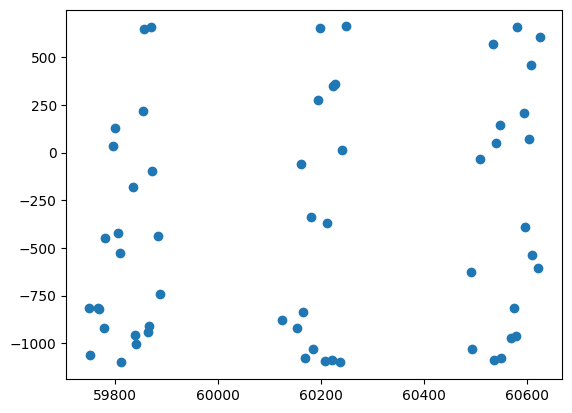

In [15]:
plt.scatter(x=seq_1["mjd"], y=seq_1["flux"])

## Przetwarzanie

### Wczytanie danych

In [16]:
metadata = pd.read_csv(RAW_DATA_DIR / "training_set_metadata.csv")
sequences = pd.read_csv(RAW_DATA_DIR / "training_set.csv")

labels = metadata[["object_id", "target"]].set_index("object_id")

metadata = metadata.drop(columns=["target"])
metadata = metadata.set_index("object_id")
metadata

,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
object_id,,,,,,,,,,
615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017
713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007
730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021
745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007
1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024
...,...,...,...,...,...,...,...,...,...,...
130739978,26.718750,-14.940303,172.342697,-72.255675,0,0.0000,0.0000,0.0000,NaN,0.013
130755807,120.101349,-62.696659,275.742955,-16.509746,0,0.1725,2.5606,1.1146,46.6108,0.136
130762946,203.108109,-55.682144,308.728904,6.727511,0,0.0000,0.0000,0.0000,NaN,0.430


In [17]:
def get_sequence(
    sequences_df: pd.DataFrame, object_id: int, passband: int
) -> np.ndarray:
    seq = sequences_df[
        (sequences_df["object_id"] == object_id)
        & (sequences_df["passband"] == passband)
    ].copy()
    seq.sort_values(by="mjd", inplace=True)
    seq = seq[["mjd", "flux", "flux_err", "detected"]]
    return seq.values


def get_single_item(
    metadata_df: pd.DataFrame,
    sequences_df: pd.DataFrame,
    labels_df: pd.DataFrame,
    object_id: int,
) -> dict[str, Any]:
    return {
        "label": labels_df.loc[object_id].iloc[0],
        "metadata": metadata_df.loc[object_id].values,
        "sequences": {
            0: get_sequence(sequences_df, object_id, 0),
            1: get_sequence(sequences_df, object_id, 1),
            2: get_sequence(sequences_df, object_id, 2),
            3: get_sequence(sequences_df, object_id, 3),
            4: get_sequence(sequences_df, object_id, 4),
            5: get_sequence(sequences_df, object_id, 5),
        },
    }

In [18]:
item = get_single_item(metadata, sequences, labels, 615)
item["metadata"]

array([ 3.49046051e+02, -6.19438360e+01,  3.20796530e+02, -5.17537060e+01,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                   nan,  1.70000000e-02])

In [19]:
item["sequences"][1][:10]

array([[ 5.97504306e+04, -8.16434326e+02,  5.55337000e+00,
         1.00000000e+00],
       [ 5.97524147e+04, -1.06145703e+03,  6.47299400e+00,
         1.00000000e+00],
       [ 5.97673045e+04, -8.15188599e+02,  5.29301900e+00,
         1.00000000e+00],
       [ 5.97702256e+04, -8.20042786e+02,  5.87532900e+00,
         1.00000000e+00],
       [ 5.97793265e+04, -9.21002502e+02,  6.30680000e+00,
         1.00000000e+00],
       [ 5.97821974e+04, -4.49095612e+02,  4.02831000e+00,
         1.00000000e+00],
       [ 5.97972938e+04,  3.55118220e+01,  3.16364600e+00,
         1.00000000e+00],
       [ 5.98003244e+04,  1.29541901e+02,  4.35877600e+00,
         1.00000000e+00],
       [ 5.98071815e+04, -4.20796417e+02,  4.03773500e+00,
         1.00000000e+00],
       [ 5.98101122e+04, -5.27020325e+02,  4.20417300e+00,
         1.00000000e+00]])

In [20]:
type(item["sequences"][1])

numpy.ndarray

In [21]:
item["label"]

np.int64(92)

In [22]:
object_ids

array([      615,       713,       730, ..., 130762946, 130772921,
       130779836], shape=(7848,))

## Brakujące dane

In [23]:
metadata.isnull().sum()

ra                       0
decl                     0
gal_l                    0
gal_b                    0
ddf                      0
hostgal_specz            0
hostgal_photoz           0
hostgal_photoz_err       0
distmod               2325
mwebv                    0
dtype: int64

In [24]:
seqs.isnull().sum()

object_id    0
mjd          0
passband     0
flux         0
flux_err     0
detected     0
dtype: int64

Brakujące dane występują jedynie w kolumnie `distmod` w metadanych

In [25]:
missing_distmod_percentage = (
    metadata["distmod"].isnull().sum() / metadata["distmod"].count()
) * 100
print(f"Missing {round(missing_distmod_percentage, 2)}% of distmod entries")

Missing 42.1% of distmod entries


In [26]:
metadata[metadata["distmod"].isnull()]

,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
object_id,,,,,,,,,,
615,349.046051,-61.943836,320.796530,-51.753706,1,0.0,0.0,0.0,NaN,0.017
1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0,0.0,0.0,NaN,0.020
1926,149.414062,1.940072,236.565366,41.393323,1,0.0,0.0,0.0,NaN,0.018
2624,346.655182,-63.260487,320.952196,-50.040935,1,0.0,0.0,0.0,NaN,0.019
2677,53.964844,-28.630989,225.142950,-53.813613,1,0.0,0.0,0.0,NaN,0.009
...,...,...,...,...,...,...,...,...,...,...
130727624,294.960938,-4.031936,34.856817,-12.602145,0,0.0,0.0,0.0,NaN,0.291
130739978,26.718750,-14.940303,172.342697,-72.255675,0,0.0,0.0,0.0,NaN,0.013
130762946,203.108109,-55.682144,308.728904,6.727511,0,0.0,0.0,0.0,NaN,0.430


In [19]:
metadata[metadata["distmod"].notnull()]

,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
object_id,,,,,,,,,,
713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007
730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021
745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007
1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024
1598,347.846710,-64.760857,318.929827,-49.143596,1,0.1352,0.1820,0.0304,39.7279,0.019
...,...,...,...,...,...,...,...,...,...,...
130659834,174.902344,-2.089372,269.456940,56.041993,0,0.4215,0.3775,0.0206,41.5364,0.024
130678775,142.734375,-23.480536,254.430952,19.977762,0,0.0584,0.0885,0.0149,38.0319,0.056
130695262,90.000000,-20.264481,226.045011,-20.105392,0,0.1273,2.6113,0.9733,46.6624,0.043


Zmienna `distmod` wyliczana jest na podstawie wartości redshiftów (`hostgal_specz` i `hostgal_photoz`), w dokumencie opisującym dane napisane jest:
```
The given redshift for objects in our own Milky Way galaxy is given as zero.
```

Żeby rozróżnić obiekty z i spoza naszej galaktyki, dodajemy flagę `is_extragalactic`, która będzie znacznikiem brakujących wartości redshiftów i imputujemy `distmod` zerami.

In [20]:
metadata["is_extragalactic"] = metadata["distmod"].isnull()
metadata["distmod"] = metadata["distmod"].fillna(0)
metadata

,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,is_extragalactic
object_id,,,,,,,,,,,
615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,0.0000,0.017,True
713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,False
730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,False
745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,False
1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,False
...,...,...,...,...,...,...,...,...,...,...,...
130739978,26.718750,-14.940303,172.342697,-72.255675,0,0.0000,0.0000,0.0000,0.0000,0.013,True
130755807,120.101349,-62.696659,275.742955,-16.509746,0,0.1725,2.5606,1.1146,46.6108,0.136,False
130762946,203.108109,-55.682144,308.728904,6.727511,0,0.0000,0.0000,0.0000,0.0000,0.430,True


## Usuwanie niepotrzebnych atrybutów
Nieprzydatne są kolumny ra, decl, gal_l i gal_b odpowiadające położeniu obiektów - ich typ nie powinien być skorelowany z położeniem, a informacja o dystansie zawarta jest już w `distmod`.

Ponadto usuwamy dane dotyczące fotometrycznych wartości redshiftu i ich błędów - operujemy na zestawie treningowym i będziemy testować na jego podzestawie (potrzebujemy labeli do oceny), nie będzie nam więc brakowało pomiarów spektrometrycznych.

In [21]:
metadata = metadata.drop(
    columns=["ra", "decl", "gal_l", "gal_b", "hostgal_photoz", "hostgal_photoz_err"]
)
metadata

,ddf,hostgal_specz,distmod,mwebv,is_extragalactic
object_id,,,,,
615,1,0.0000,0.0000,0.017,True
713,1,1.8181,45.4063,0.007,False
730,1,0.2320,40.2561,0.021,False
745,1,0.3037,40.7951,0.007,False
1124,1,0.1934,40.4166,0.024,False
...,...,...,...,...,...
130739978,0,0.0000,0.0000,0.013,True
130755807,0,0.1725,46.6108,0.136,False
130762946,0,0.0000,0.0000,0.430,True


## Feature engineering - szeregi czasowe

Na wejście LSTM zamiast daty w formacie modified julian będziemy przekazywać różnicę w czasie od poprzedniego kroku - wartościowe dla modelu są informacje o względnych różnicach w czasie pomiarów, a nie konkretnych datach z nimi związanymi. Model nie nauczy się artefaktów związanych z bezwzględnymi timestampami poszczególnych pomiarów.

Dodatkowo dorzucamy:

1. signal to noise ratio
2. kumulatywny czas od początku pomiaru - generalizacja trendów przy późnych/wczesnych punktach pomiarowych

In [30]:
seqs

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
...,...,...,...,...,...,...
1421700,130779836,60555.9838,4,-39.881969,46.477093,0
1421701,130779836,60560.0459,1,14.894439,18.947685,0
1421702,130779836,60571.0225,5,30.593130,50.695290,0
1421703,130779836,60585.9974,4,-23.471439,44.819859,0


In [23]:
seqs = seqs.sort_values(["object_id", "passband", "mjd"])
seqs["delta_t"] = seqs.groupby(["object_id", "passband"])["mjd"].diff().fillna(0.0)
seqs

,object_id,mjd,passband,flux,flux_err,detected,delta_t
54,615,59819.1532,0,6.878784,3.633152,0,0.0000
55,615,59820.1047,0,39.364853,3.775619,1,0.9515
56,615,59821.1026,0,-10.422381,4.172683,0,0.9979
57,615,59822.1105,0,-65.485130,4.362876,1,1.0079
58,615,59823.1505,0,-113.349159,4.069051,1,1.0400
...,...,...,...,...,...,...,...
1421687,130779836,60515.2731,5,-81.113083,46.094658,0,9.1769
1421693,130779836,60536.0451,5,5.653964,53.119434,0,20.7720
1421697,130779836,60545.9844,5,32.006413,77.931732,0,9.9393
1421698,130779836,60546.9804,5,68.152985,56.351048,0,0.9960


Dodatkowo skalujemy delta_t dla obiektów poza naszym układem ze względu na dylatację czasu zgodnie z 7. stroną dokumentu:

In [24]:
seqs_merged = seqs.merge(
    meta[["object_id", "hostgal_photoz"]], on="object_id", how="left"
)

seqs["delta_t"] /= 1.0 + seqs_merged["hostgal_photoz"]
seqs

,object_id,mjd,passband,flux,flux_err,detected,delta_t
54,615,59819.1532,0,6.878784,3.633152,0,0.0000
55,615,59820.1047,0,39.364853,3.775619,1,0.9515
56,615,59821.1026,0,-10.422381,4.172683,0,0.9979
57,615,59822.1105,0,-65.485130,4.362876,1,1.0079
58,615,59823.1505,0,-113.349159,4.069051,1,1.0400
...,...,...,...,...,...,...,...
1421687,130779836,60515.2731,5,-81.113083,46.094658,0,9.1769
1421693,130779836,60536.0451,5,5.653964,53.119434,0,20.7720
1421697,130779836,60545.9844,5,32.006413,77.931732,0,9.9393
1421698,130779836,60546.9804,5,68.152985,56.351048,0,0.9960


In [33]:
seqs = seqs.assign(snr=seqs["flux"].abs() / seqs["flux_err"])
seqs

,object_id,mjd,passband,flux,flux_err,detected,delta_t,snr
54,615,59819.1532,0,6.878784,3.633152,0,0.0000,1.893338
55,615,59820.1047,0,39.364853,3.775619,1,0.9515,10.426066
56,615,59821.1026,0,-10.422381,4.172683,0,0.9979,2.497765
57,615,59822.1105,0,-65.485130,4.362876,1,1.0079,15.009624
58,615,59823.1505,0,-113.349159,4.069051,1,1.0400,27.856411
...,...,...,...,...,...,...,...,...
1421687,130779836,60515.2731,5,-81.113083,46.094658,0,9.1769,1.759707
1421693,130779836,60536.0451,5,5.653964,53.119434,0,20.7720,0.106439
1421697,130779836,60545.9844,5,32.006413,77.931732,0,9.9393,0.410698
1421698,130779836,60546.9804,5,68.152985,56.351048,0,0.9960,1.209436


In [34]:
seqs["delta_t_cumsum"] = seqs.groupby(["object_id", "passband"])["delta_t"].cumsum()
seqs

,object_id,mjd,passband,flux,flux_err,detected,delta_t,snr,delta_t_cumsum
54,615,59819.1532,0,6.878784,3.633152,0,0.0000,1.893338,0.0000
55,615,59820.1047,0,39.364853,3.775619,1,0.9515,10.426066,0.9515
56,615,59821.1026,0,-10.422381,4.172683,0,0.9979,2.497765,1.9494
57,615,59822.1105,0,-65.485130,4.362876,1,1.0079,15.009624,2.9573
58,615,59823.1505,0,-113.349159,4.069051,1,1.0400,27.856411,3.9973
...,...,...,...,...,...,...,...,...,...
1421687,130779836,60515.2731,5,-81.113083,46.094658,0,9.1769,1.759707,799.9412
1421693,130779836,60536.0451,5,5.653964,53.119434,0,20.7720,0.106439,820.7132
1421697,130779836,60545.9844,5,32.006413,77.931732,0,9.9393,0.410698,830.6525
1421698,130779836,60546.9804,5,68.152985,56.351048,0,0.9960,1.209436,831.6485


## Dodatkowe atrybuty dla metadanych
1. n_obs - łączna liczba obserwacji
2. n_detections - liczba razy, gdy obiekt był wykryty
3. t_span - łączny okres pomiaru; max(mjd) - min(mjd)
4. max snr per pasmo - informacja o jasności w danym pasmie biorąca pod uwagę błąd pomiaru
5. średnia wartość fluxu per pasmo

In [35]:
metadata = metadata.merge(
    seqs.groupby("object_id").size().rename("n_obs"), on="object_id", how="left"
)
metadata

,ddf,hostgal_specz,distmod,mwebv,is_extragalactic,n_obs
object_id,,,,,,
615,1,0.0000,0.0000,0.017,True,352
713,1,1.8181,45.4063,0.007,False,350
730,1,0.2320,40.2561,0.021,False,330
745,1,0.3037,40.7951,0.007,False,351
1124,1,0.1934,40.4166,0.024,False,352
...,...,...,...,...,...,...
130739978,0,0.0000,0.0000,0.013,True,147
130755807,0,0.1725,46.6108,0.136,False,114
130762946,0,0.0000,0.0000,0.430,True,134


In [36]:
n_detected = seqs.groupby("object_id")["detected"].sum().rename("n_detections")
metadata = metadata.merge(n_detected, on="object_id", how="left")
metadata

,ddf,hostgal_specz,distmod,mwebv,is_extragalactic,n_obs,n_detections
object_id,,,,,,,
615,1,0.0000,0.0000,0.017,True,352,333
713,1,1.8181,45.4063,0.007,False,350,60
730,1,0.2320,40.2561,0.021,False,330,23
745,1,0.3037,40.7951,0.007,False,351,61
1124,1,0.1934,40.4166,0.024,False,352,61
...,...,...,...,...,...,...,...
130739978,0,0.0000,0.0000,0.013,True,147,5
130755807,0,0.1725,46.6108,0.136,False,114,6
130762946,0,0.0000,0.0000,0.430,True,134,7


In [37]:
t_span = (
    seqs.groupby("object_id")["mjd"]
    .agg(lambda vals: vals.max() - vals.min())
    .rename("t_span")
)
metadata = metadata.merge(t_span, on="object_id", how="left")
metadata

,ddf,hostgal_specz,distmod,mwebv,is_extragalactic,n_obs,n_detections,t_span
object_id,,,,,,,,
615,1,0.0000,0.0000,0.017,True,352,333,873.7903
713,1,1.8181,45.4063,0.007,False,350,60,848.8198
730,1,0.2320,40.2561,0.021,False,330,23,853.8455
745,1,0.3037,40.7951,0.007,False,351,61,853.7060
1124,1,0.1934,40.4166,0.024,False,352,61,873.7903
...,...,...,...,...,...,...,...,...
130739978,0,0.0000,0.0000,0.013,True,147,5,880.7021
130755807,0,0.1725,46.6108,0.136,False,114,6,1091.7966
130762946,0,0.0000,0.0000,0.430,True,134,7,1050.1433


In [38]:
max_snr_per_band = seqs.groupby(["object_id", "passband"])["snr"].agg(max_snr="max")
max_snr_wide = (
    seqs.groupby(["object_id", "passband"])["snr"]
    .max()
    .unstack("passband")
    .add_prefix("max_snr_")
    .fillna(0.0)
    .reset_index()
)
metadata = metadata.merge(max_snr_wide, how="left", on="object_id")
metadata

,object_id,ddf,hostgal_specz,distmod,mwebv,is_extragalactic,n_obs,n_detections,t_span,max_snr_0,max_snr_1,max_snr_2,max_snr_3,max_snr_4,max_snr_5
0,615,1,0.0000,0.0000,0.017,True,352,333,873.7903,38.903689,164.236814,168.780747,148.233053,118.401221,66.044366
1,713,1,1.8181,45.4063,0.007,False,350,60,848.8198,7.365345,14.218556,14.027270,9.992029,7.448338,3.640790
2,730,1,0.2320,40.2561,0.021,False,330,23,853.8455,2.047907,2.087470,20.046549,20.084835,17.816878,8.572702
3,745,1,0.3037,40.7951,0.007,False,351,61,853.7060,9.589449,134.195954,147.970001,109.157198,65.145271,19.283287
4,1124,1,0.1934,40.4166,0.024,False,352,61,873.7903,2.246414,30.630641,75.149396,64.096188,47.470334,15.575831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,130739978,0,0.0000,0.0000,0.013,True,147,5,880.7021,7.815263,51.051532,13.198496,3.940033,2.572283,11.472177
7844,130755807,0,0.1725,46.6108,0.136,False,114,6,1091.7966,14.168214,13.436488,1.264968,28.139936,29.166748,3.393412
7845,130762946,0,0.0000,0.0000,0.430,True,134,7,1050.1433,1.765291,4.544942,11.181214,5.903509,2.088199,2.476208
7846,130772921,0,0.0000,0.0000,0.034,True,144,3,1082.0163,2.882449,71.648304,12.292113,1.989865,1.654952,7.604150


In [39]:
mean_flux_wide = (
    seqs.groupby(["object_id", "passband"])["flux"]
    .mean()
    .unstack("passband")
    .add_prefix("mean_flux_")
    .fillna(0.0)
    .reset_index()
)
metadata.merge(mean_flux_wide, how="left", on="object_id")

,object_id,ddf,hostgal_specz,distmod,mwebv,is_extragalactic,n_obs,n_detections,t_span,max_snr_0,...,max_snr_2,max_snr_3,max_snr_4,max_snr_5,mean_flux_0,mean_flux_1,mean_flux_2,mean_flux_3,mean_flux_4,mean_flux_5
0,615,1,0.0000,0.0000,0.017,True,352,333,873.7903,38.903689,...,168.780747,148.233053,118.401221,66.044366,-3.254554,-385.699911,-134.146566,-121.103501,-55.954592,-47.449847
1,713,1,1.8181,45.4063,0.007,False,350,60,848.8198,7.365345,...,14.027270,9.992029,7.448338,3.640790,-2.720398,-1.019804,-0.794238,-0.986966,-0.900262,-1.794175
2,730,1,0.2320,40.2561,0.021,False,330,23,853.8455,2.047907,...,20.046549,20.084835,17.816878,8.572702,-0.048080,0.141057,2.400870,3.236164,4.308728,4.539396
3,745,1,0.3037,40.7951,0.007,False,351,61,853.7060,9.589449,...,147.970001,109.157198,65.145271,19.283287,1.797523,5.717394,9.711532,14.412924,13.134436,10.746138
4,1124,1,0.1934,40.4166,0.024,False,352,61,873.7903,2.246414,...,75.149396,64.096188,47.470334,15.575831,0.660948,4.634637,10.243968,11.086555,9.906102,6.896742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,130739978,0,0.0000,0.0000,0.013,True,147,5,880.7021,7.815263,...,13.198496,3.940033,2.572283,11.472177,1.286655,11.604012,1.487066,4.696556,-1.326906,20.073462
7844,130755807,0,0.1725,46.6108,0.136,False,114,6,1091.7966,14.168214,...,1.264968,28.139936,29.166748,3.393412,24.635243,6.965825,-0.779640,27.147503,40.758273,3.528390
7845,130762946,0,0.0000,0.0000,0.430,True,134,7,1050.1433,1.765291,...,11.181214,5.903509,2.088199,2.476208,-0.282914,-20.094296,-28.388796,-13.723449,-15.201844,-9.838345
7846,130772921,0,0.0000,0.0000,0.034,True,144,3,1082.0163,2.882449,...,12.292113,1.989865,1.654952,7.604150,3.374208,28.342250,0.618994,-0.357920,-1.135067,7.671389


## Normalizacja - szeregi czasowe
Normalizujemy dane zawarte w szeregach czasowych - LSTM lepiej radzi sobie z "kształtem" danych, ich dokładna skala nie będzie potrzebna. Normalizujemy wartości flux i flux_err dla każdego ciągu (per obiekt i pasmo). Zagregowane dane zawierające informacje o skali dodane będą do metadanych wrzucanych na wejście MLP -> będą one normalizowane po dodaniu wyliczanych atrybutów.

Normalizujemy przez podzielenie przez medianę wartości bezwzględnej fluxu
- mediana zamiast średniej - nie chcemy, aby pojedyncze zaszumione skoki wpływały na skalę mającą odzwierciedlać tendencję całego szeregu czasowego
- wartość bezwzględna - znak nie jest istotny w pojedynczym pomiarze (pomiar jest różnicą obrazów, interesuje nas magnituda, informacja o znaku jest zachowywana w szeregu czasowym jeśli dzielimy przez dodatnie liczby)

In [40]:
scale = (
    seqs.assign(abs_flux=seqs["flux"].abs())
    .groupby(["object_id", "passband"])["abs_flux"]
    .mean()
    .rename("flux_scale")
    .replace(0.0, 1.0)
)

seqs = seqs.merge(scale, on=["object_id", "passband"], how="left")
seqs["flux_norm"] = seqs["flux"] / seqs["flux_scale"]
seqs["flux_err_norm"] = seqs["flux_err"] / seqs["flux_scale"]
seqs = seqs.drop(columns=["flux_scale"])
seqs

,object_id,mjd,passband,flux,flux_err,detected,delta_t,snr,delta_t_cumsum,flux_norm,flux_err_norm
0,615,59819.1532,0,6.878784,3.633152,0,0.0000,1.893338,0.0000,0.092428,0.048817
1,615,59820.1047,0,39.364853,3.775619,1,0.9515,10.426066,0.9515,0.528930,0.050732
2,615,59821.1026,0,-10.422381,4.172683,0,0.9979,2.497765,1.9494,-0.140041,0.056067
3,615,59822.1105,0,-65.485130,4.362876,1,1.0079,15.009624,2.9573,-0.879898,0.058622
4,615,59823.1505,0,-113.349159,4.069051,1,1.0400,27.856411,3.9973,-1.523028,0.054674
...,...,...,...,...,...,...,...,...,...,...,...
1421700,130779836,60515.2731,5,-81.113083,46.094658,0,9.1769,1.759707,799.9412,-0.019457,0.011057
1421701,130779836,60536.0451,5,5.653964,53.119434,0,20.7720,0.106439,820.7132,0.001356,0.012742
1421702,130779836,60545.9844,5,32.006413,77.931732,0,9.9393,0.410698,830.6525,0.007678,0.018694
1421703,130779836,60546.9804,5,68.152985,56.351048,0,0.9960,1.209436,831.6485,0.016348,0.013517


## Normalizacja - metadane

rozważmy dystrybucję wartości poszczególnych kolumn

In [41]:
metadata.columns

Index(['object_id', 'ddf', 'hostgal_specz', 'distmod', 'mwebv',
       'is_extragalactic', 'n_obs', 'n_detections', 't_span', 'max_snr_0',
       'max_snr_1', 'max_snr_2', 'max_snr_3', 'max_snr_4', 'max_snr_5'],
      dtype='object')

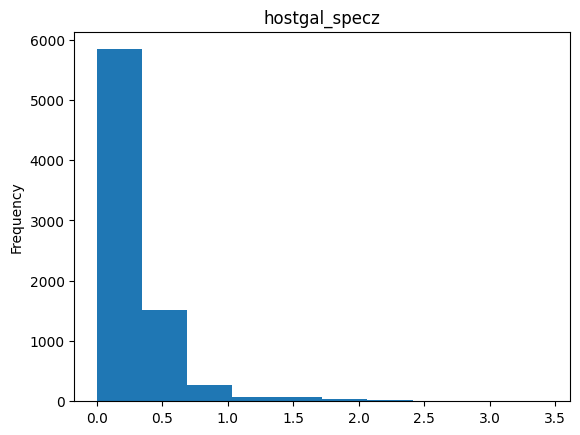

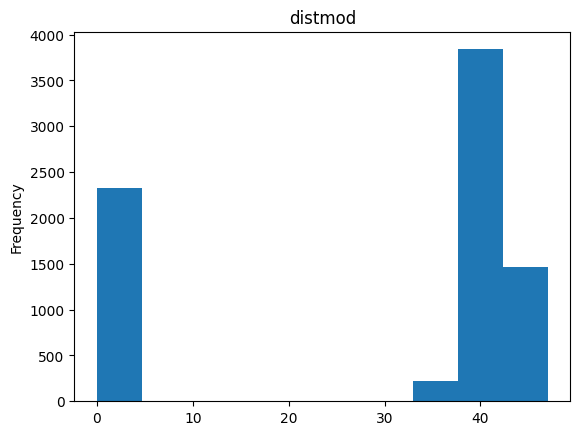

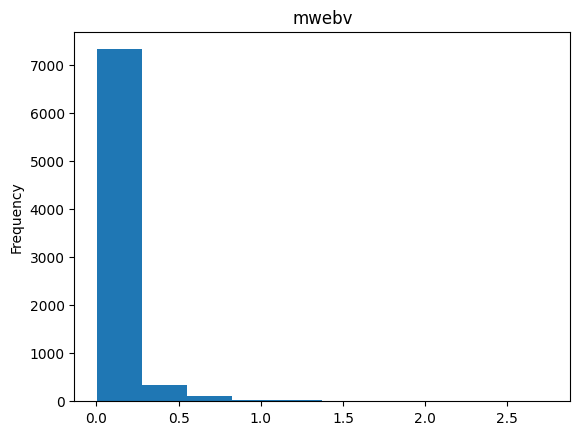

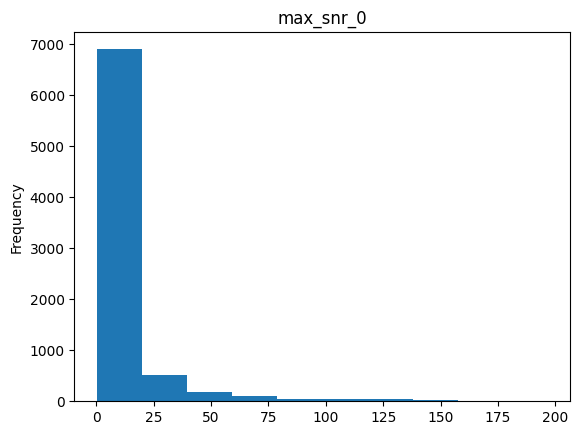

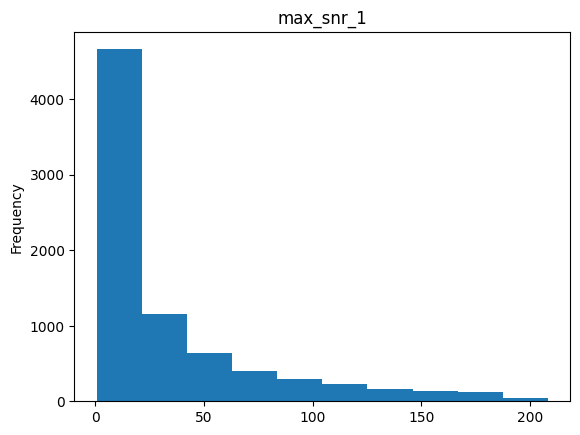

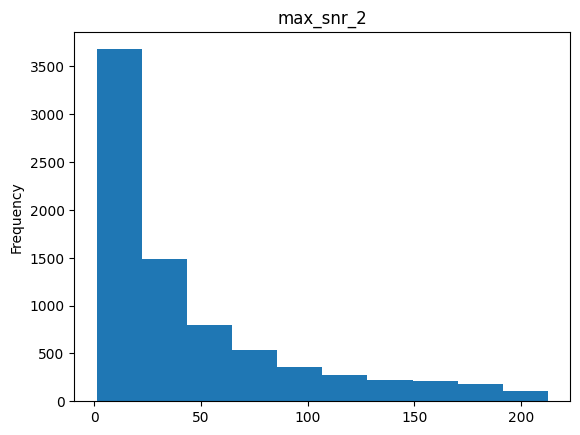

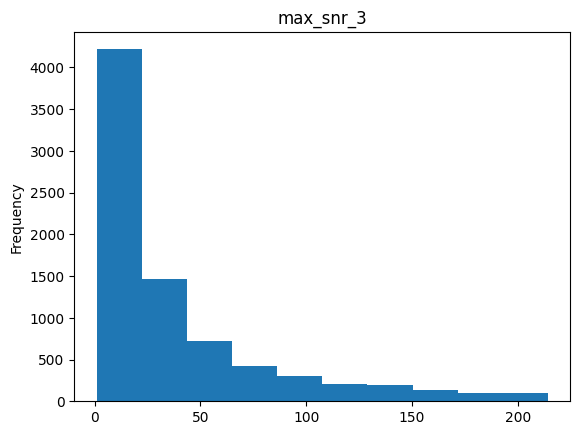

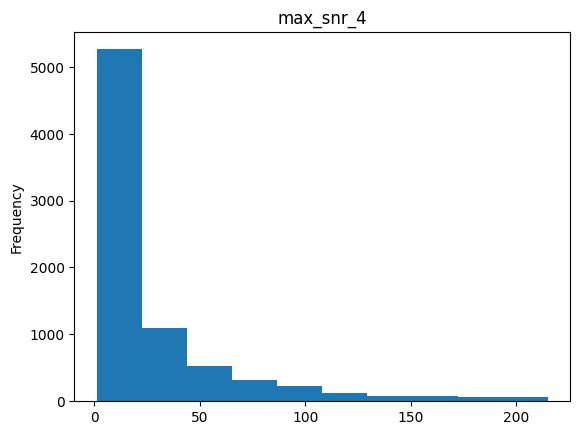

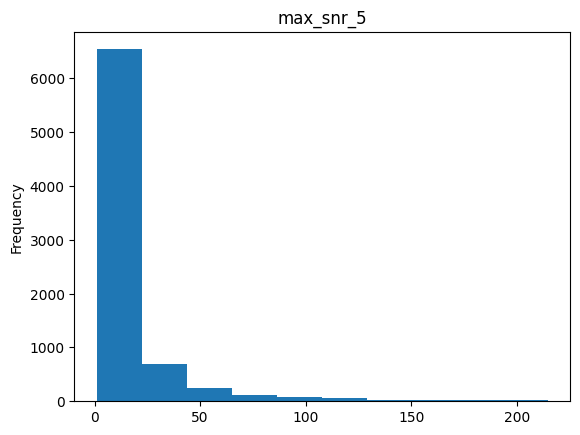

<Figure size 640x480 with 0 Axes>

In [42]:
def hist_for_col(df, col):
    df[col].plot(kind="hist", title=col)
    plt.show()
    plt.figure()


cols_to_skip = {
    "object_id",
    "ddf",
    "is_extragalactic",
    "n_obs",
    "n_detections",
    "t_span",
}

for col in metadata.columns:
    if col not in cols_to_skip:
        hist_for_col(metadata, col)

- hostgal_specz - skrzywiony rozkład, ale nie na tyle, żeby skalować logarytmicznie przed normalizacją, standardscaler
- distmod - standardscaler
- mwebv - log1p + standardscaler, dużo próbek o małych wartościach i długi ogon
- snr - standardscaler, zachowujemy informację o liniowości współczynnika

scalery wyliczone i zastosowane w ostatecznym przetwarzaniu danych

## Użycie zaimplementowanego procesora

In [26]:
from supernova.dataset import DatasetProcessor

# trwa 3-4min, overwrite=False czyta z dysku jeśli istnieje
processor = DatasetProcessor(
    metadata_path=RAW_DATA_DIR / "training_set_metadata.csv",
    lightcurves_path=RAW_DATA_DIR / "training_set.csv",
    output_path=PROCESSED_DATA_DIR / "training_set.pkl",
    overwrite=False,
)
dataset = processor.process()

Processed dataset file already exists on disk. Loading it.


In [30]:
loaded_dataset = DatasetProcessor.load_from_file(
    PROCESSED_DATA_DIR / "training_set.pkl"
)
entry = loaded_dataset[0]
seq = entry["sequences"][0][0]
meta = entry["metadata"]

len(seq)
# 6 - delta_t, delta_t_cumsum, "flux_norm", "flux_err_norm", "snr", "detected",

6

In [32]:
len(meta)

# 20 - ddf, hostgal_specz, distmod, mwebv, is_extragalactic, n_obs, n_detections, t_span, max_snr_0..5, mean_flux_0..5

20